In [1]:
import pandas  as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

# Cargar datos

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dfbustosus/Curso_DS_para_todos/main/insurance.csv')
print(df.shape)
df.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


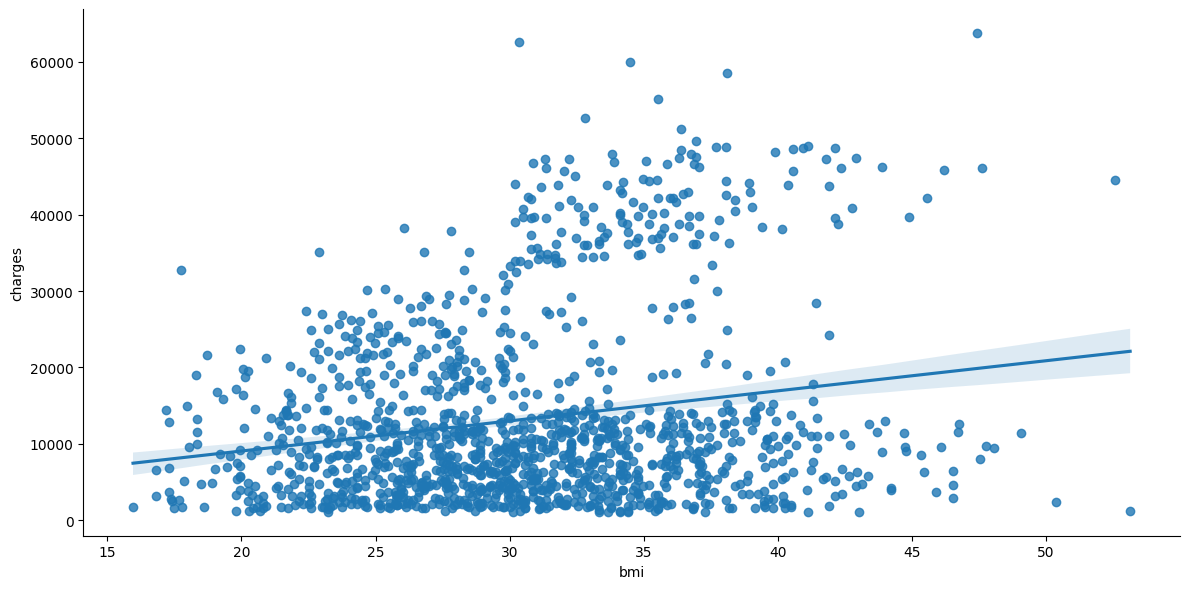

In [3]:
sns.lmplot(x='bmi',y='charges',data=df,aspect=2,height=6)

# EDA

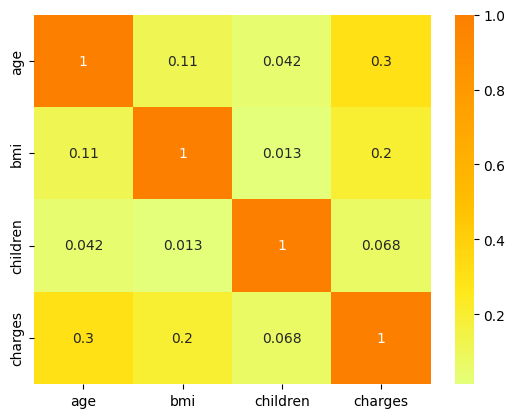

In [4]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

No hay correlacion fuerte en este caso

C:\Users\Windows\AppData\Local\Temp\ipykernel_752\852518737.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'],bins=50,color='r',ax=ax)
C:\Users\Windows\AppData\Local\Temp\ipykernel_752\852518737.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df['charges']),bins=40,c

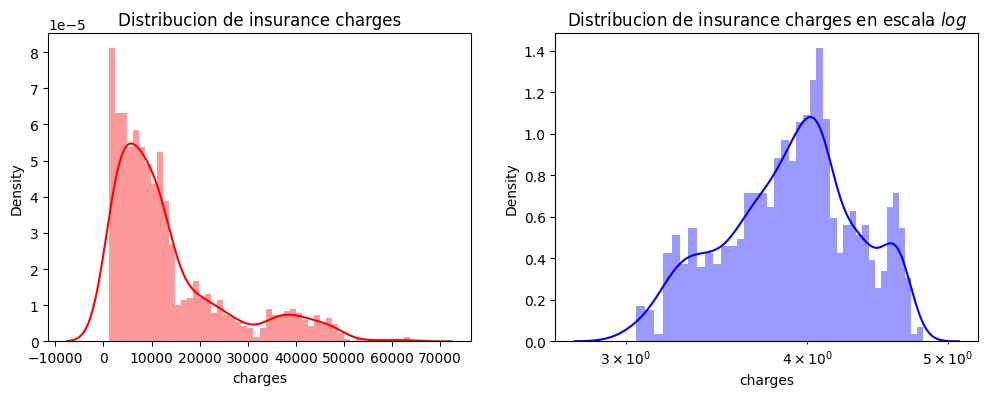

In [5]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribucion de insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribucion de insurance charges en escala $log$')
ax.set_xscale('log');

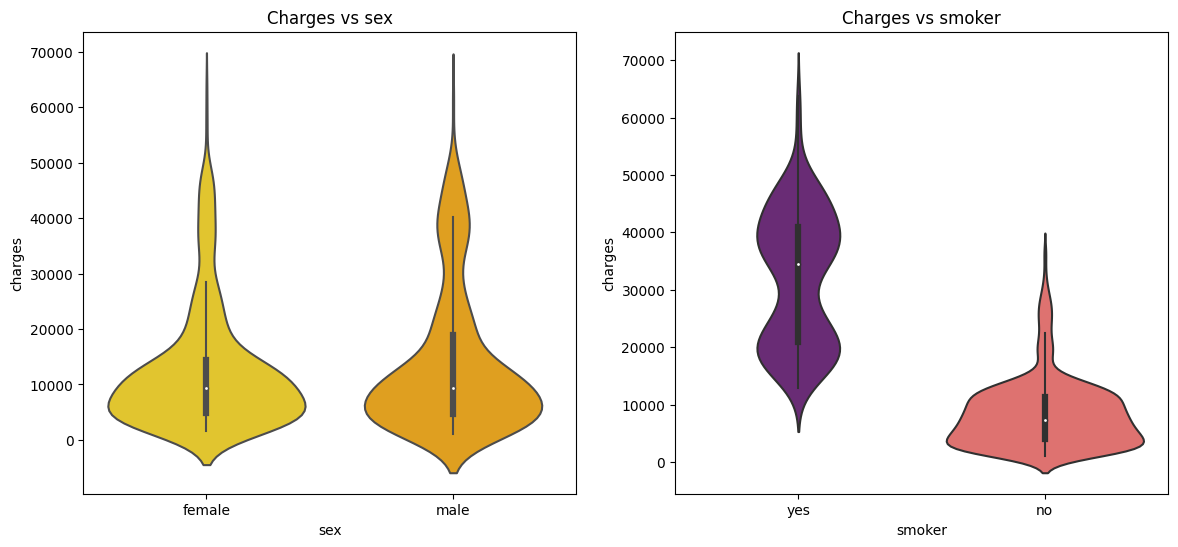

In [6]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges',data=df,palette='Wistia',ax=ax)
ax.set_title('Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=df,palette='magma',ax=ax)
ax.set_title('Charges vs smoker');

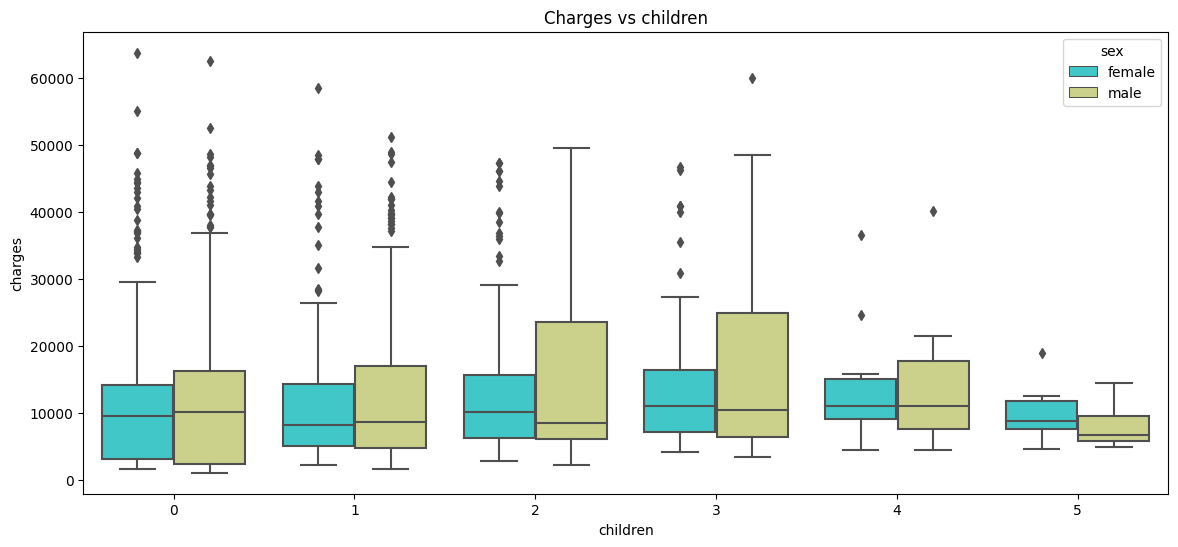

In [7]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=df,palette='rainbow')
plt.title('Charges vs children');

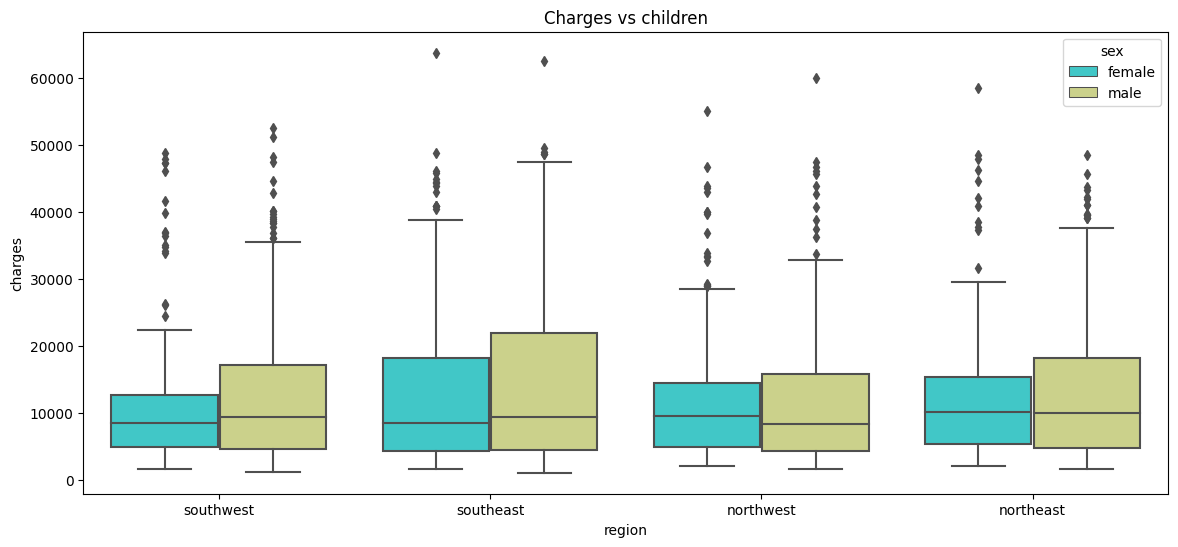

In [8]:
plt.figure(figsize=(14,6))
sns.boxplot(x='region', y='charges',hue='sex',data=df,palette='rainbow')
plt.title('Charges vs children');

Text(0.5, 1.0, 'Charges vs bmi')

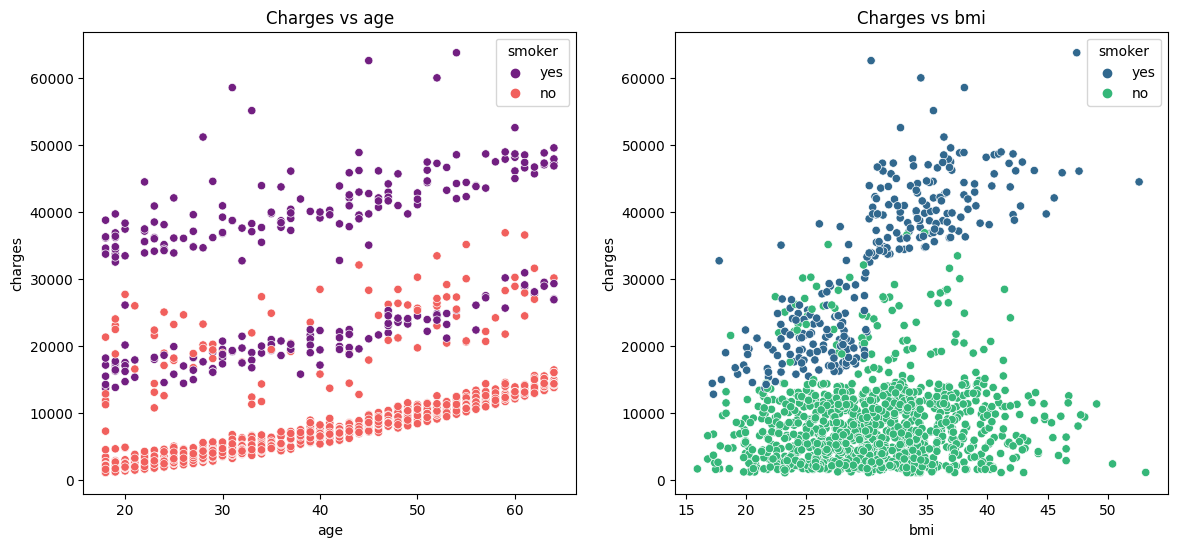

In [9]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Charges vs bmi')

In [10]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


# Feature Engineering

In [11]:
# Dummys
cat = ['sex', 'smoker', 'region']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = cat,
               drop_first =True,
              dtype='int8')
df_encode

,age,bmi,children,charges,OHE_male,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


Transformacion Box Cox sobre variable y

$$\frac{y^{\lambda}-1}{\lambda}, \lambda \neq 0$$
$$log(y),\lambda =0$$

In [12]:
# Encontrar valor de lambda
from scipy.stats import boxcox
y_bc,lam, ci= boxcox(df_encode['charges'],alpha=0.05)
lam # entonces 0 -log

0.043649053770664956

In [13]:
df_encode['charges'] = np.log(df_encode['charges'])

In [14]:
df_encode

,age,bmi,children,charges,OHE_male,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,0,9.734176,0,1,0,0,1
1,18,33.770,1,7.453302,1,0,0,1,0
2,28,33.000,3,8.400538,1,0,0,1,0
3,33,22.705,0,9.998092,1,0,1,0,0
4,32,28.880,0,8.260197,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,9.268661,1,0,1,0,0
1334,18,31.920,0,7.698927,0,0,0,0,0
1335,18,36.850,0,7.396233,0,0,0,1,0
1336,21,25.800,0,7.604867,0,0,0,0,1


# Modelo

In [15]:
X = df_encode.drop('charges',axis=1) # Independet variable
y = df_encode['charges'] # dependent variable
import statsmodels.api as sm
x = sm.add_constant(X)
model = sm.OLS(y, x).fit()
pred = model.predict(x) 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     549.8
Date:                Sun, 30 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:08:39   Log-Likelihood:                -808.52
No. Observations:                1338   AIC:                             1635.
Df Residuals:                    1329   BIC:                             1682.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.0306      0.072     97.112

# Validacion del modelo

In [19]:
pred

0        9.486137
1        7.973939
2        8.513171
3        8.336224
4        8.384231
          ...    
1333     9.340225
1334     8.079952
1335     7.988693
1336     7.972891
1337    11.019379
Length: 1338, dtype: float64

C:\Users\Windows\AppData\Local\Temp\ipykernel_752\3439926729.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y - pred),ax=ax,color='b')


-7.476497414859873e-15


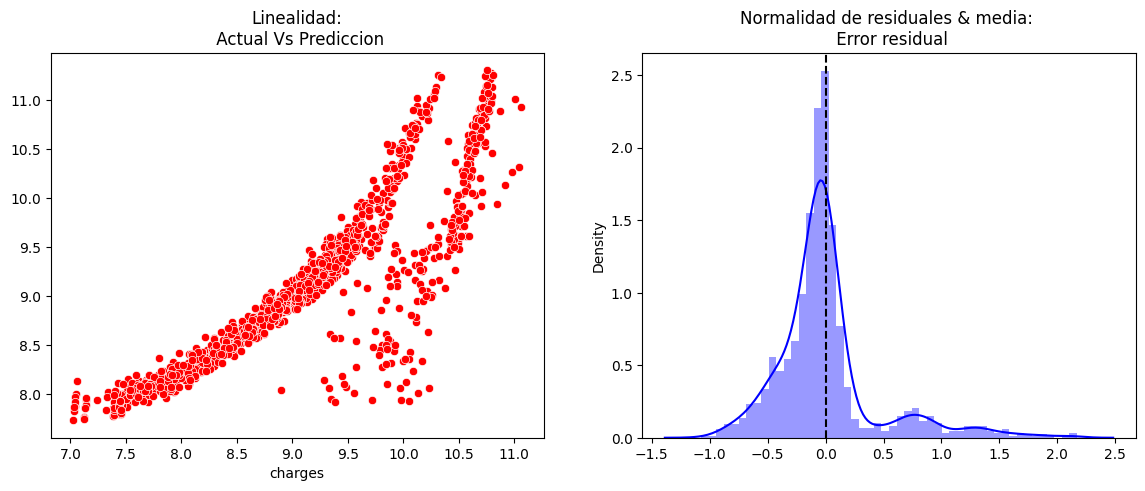

In [21]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y,y=pred,ax=ax,color='r')
ax.set_title('Linealidad:\n Actual Vs Prediccion')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y - pred),ax=ax,color='b')
ax.axvline((y - pred).mean(),color='k',linestyle='--')
print((y - pred).mean())
ax.set_title('Normalidad de residuales & media: \n Error residual');

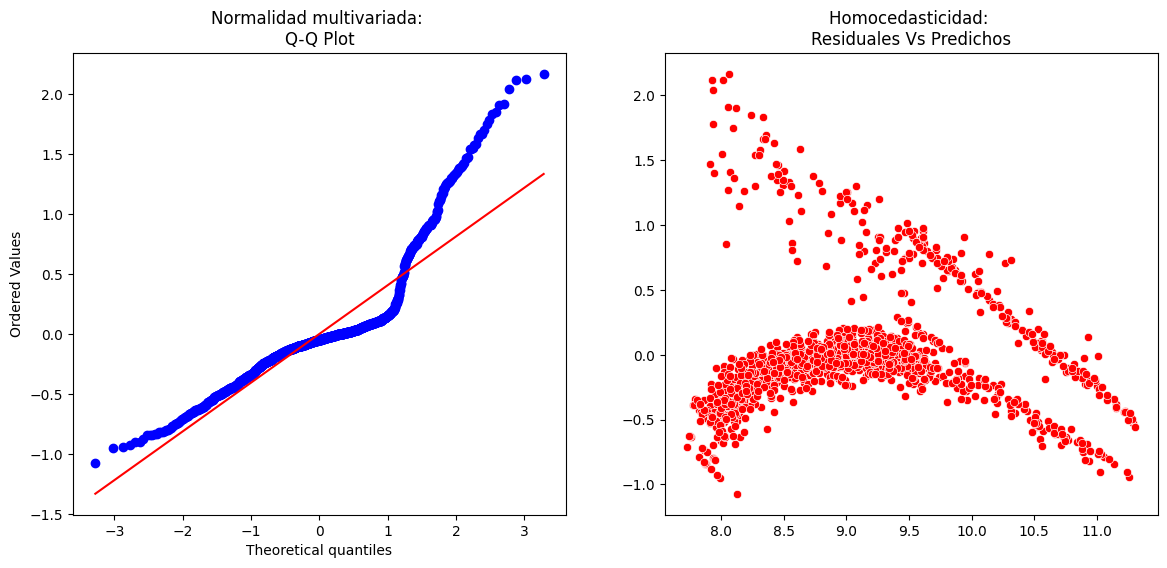

In [22]:
# Normalidad multivariada
# Q-Q plot
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y - pred),fit=True,plot=ax[0])
ax[0].set_title('Normalidad multivariada: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y - pred), x= pred, ax = ax[1],color='r') 
ax[1].set_title('Homocedasticidad: \nResiduales Vs Predichos');

In [23]:
model.rsquared

0.7679477609588367

In [24]:
# Multicolinealidad
#Variance Inflation Factor
VIF = 1/(1- model.rsquared)
VIF

4.309374493139933

Luego del analisis tenemos

1. En nuestro modelo, la gráfica datos reales vs predicicones es una curva, por lo que la suposición lineal falla
2. La media residual es cero y aunque el gráfico de error residual está sesgado a la derecha
3. El gráfico Q-Q muestra valoressuperior a 1.5 
4. Hay heteroscedástecidad, el error aumentará después de cierto punto.
5. El VIF de varianza es inferior a 5, por lo que no hay multicolinealidad.